# Outline
* get timeseries
* extract based on event of interest

In [210]:
from os.path import join
import os, glob, re
import pandas as pd
import numpy as np
from nilearn import maskers, masking, image
from nilearn.datasets import (load_mni152_template)
import matplotlib.pyplot as plt

In [211]:
# load tsv
confounds = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0002_ses-01_task-social_acq-mb8_run-1_desc-confounds_timeseries.tsv'
# load fmriprep output
fmri_fname = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0002_ses-01_task-social_acq-mb8_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii'
beh_fname = '/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0002_ses-01_task-cue_run-01_runtype-pain_events.tsv'

In [212]:
behdf = pd.read_csv(beh_fname, sep='\t')
confoundsdf = pd.read_csv(confounds, sep='\t')

confounds_subset = confoundsdf[['csf', 'trans_x', 'trans_x_derivative1', 'trans_x_power2', 'trans_x_derivative1_power2',
                                'trans_y', 'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
                                'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2', 'trans_z_power2', 
                                'rot_x', 'rot_x_derivative1', 'rot_x_derivative1_power2', 'rot_x_power2', 
                                'rot_y', 'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2', 
                                'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2', 'rot_z_power2']]
column_means = confounds_subset.mean()
for column in confounds_subset.columns:
    confounds_subset[column].fillna(column_means[column], inplace=True)

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_53003/1909516355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confounds_subset[column].fillna(column_means[column], inplace=True)


In [213]:
subcortex_dir = '/Users/h/Documents/projects_local/Tian2020MSA/3T/Cortex-Subcortex'
subcortex = join(subcortex_dir,'MNIvolumetric', 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_3T_MNI152NLin2009cAsym_2mm.nii.gz')
subcortex_label = join(subcortex_dir,  'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_label.txt')
labels = pd.read_csv(subcortex_label, sep='\t', header=None)
template = load_mni152_template(resolution=3)
# subcortex_atlas = image.load_img(subcortex)
# subcortex_img = image.resample_to_img(subcortex_atlas, template, interpolation='nearest') #, target_affine=ref_img.affine, target_shape=ref_img.shape)
# nifti_masker = maskers.NiftiMasker(mask_img=masking.compute_epi_mask(template))


masker = maskers.NiftiLabelsMasker(
    labels_img=subcortex,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

In [214]:
time_series = masker.fit_transform(
    fmri_fname, confounds=confounds_subset)

[NiftiLabelsMasker.wrapped] loading data from /Users/h/Documents/projects_local/Tian2020MSA/3T/Cortex-Subcortex/MNIvolumetric/Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_3T_MNI152NLin2009cAsym_2mm.nii.gz
Resampling labels
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [215]:
behdf.onset03_stim/.46

0      35.338326
1     103.501674
2     185.500282
3     246.132848
4     332.664783
5     405.500978
6     472.465217
7     547.024413
8     608.100500
9     687.900978
10    753.924739
11    834.144957
Name: onset03_stim, dtype: float64

In [216]:
subcortex_img = image.load_img(subcortex)

In [217]:
np.unique(subcortex_img.get_fdata())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [218]:
behdf

,onset01_cue,onset02_ratingexpect,onset03_stim,onset04_ratingoutcome,pmod_cuetype,pmod_stimtype,pmod_expectRT,pmod_expectangle,pmod_outcomeRT,pmod_outcomeangle,cue_con,stim_lin,stim_quad,pmod_expectangle_demean,pmod_outcomeangle_demean
0,5.49467,7.51209,16.25563,28.08652,low_cue,med_stim,4.000000,NaN,3.972358,71.565051,-1,0,-2,0.000000,-11.647871
1,33.78867,36.08953,47.61077,58.48131,low_cue,low_stim,2.552708,5.527540,3.751581,40.072890,-1,-1,1,-73.812134,-43.140032
2,74.18723,76.50477,85.33013,96.39561,low_cue,high_stim,2.037590,18.943263,2.051303,107.271743,-1,1,1,-60.396411,24.058820
3,103.78173,106.59946,113.22111,127.39063,high_cue,low_stim,2.101663,103.253716,3.051893,70.839827,1,-1,1,23.914042,-12.373096
4,138.29474,139.99538,153.02580,167.18897,high_cue,med_stim,3.284695,81.218837,2.653743,77.696076,1,0,-2,1.879164,-5.516846
5,178.07641,179.89377,186.53045,200.68494,high_cue,high_stim,2.434374,97.153564,3.707934,114.579314,1,1,1,17.813891,31.366392
6,206.68721,209.68834,217.33400,235.78152,high_cue,low_stim,2.771199,117.081215,1.934242,76.575630,1,-1,1,37.741542,-6.637292
7,241.98386,244.68488,251.63123,261.59125,low_cue,high_stim,2.108263,75.629998,2.151803,84.930580,-1,1,1,-3.709675,1.717657
8,270.77805,273.79586,279.72623,300.48926,high_cue,high_stim,2.017594,101.580619,3.720702,105.094063,1,1,1,22.240945,21.881140
9,306.49153,308.79240,316.43445,327.28271,low_cue,med_stim,4.000000,NaN,2.477449,71.565051,-1,0,-2,0.000000,-11.647871


# extract timecourse per condition

In [220]:
rounded_intervals = np.round(behdf.loc[behdf['pmod_stimtype'] == 'high_stim','onset03_stim']).astype(int)
result_intervals = []

for rounded_index in rounded_intervals:
    start_index = max(0, rounded_index - 5)  # Ensure the start index is not negative
    end_index = min(len(time_series.T[0]), rounded_index + int(20) + 1)  # Add 10 data points (+1 to include the end index)
    print(start_index,end_index)
    interval = time_series.T[0][start_index:end_index]
    result_intervals.append(interval)

result_intervals = np.vstack(result_intervals)
result_intervals.shape


    # rounded_intervals = np.round(behdf.loc[behdf[column_name] == level_name,'onset03_stim']).astype(int)
    # result_intervals = []

    # for rounded_index in rounded_intervals:
    #     start_index = max(0, rounded_index - np.round(int(np.abs(prior_event_sec))*TR))  # Ensure the start index is not negative
    #     end_index = min(len(time_series), rounded_index + np.round(int(after_event_sec)*TR) + 1)  # Add 10 data points (+1 to include the end index)
    #     interval = time_series[start_index:end_index]
    #     result_intervals.append(interval)

    # result_intervals = np.vstack(result_intervals)
    # return result_intervals

80 106
182 208
247 273
275 301


(4, 26)

In [221]:
def extract_timecourse_condition(behdf, column_name, level_name, time_series, prior_event_sec, after_event_sec):
    """extract_timecourse_condition

    Args:
        behdf (pd.DataFrame): dataframe with onset time and condition type metadata
        column_name (str): Which column to reference from the behavioral dataframe
        level_name (str): which level from a given factor?
        time_series (np.array): array from masker extraction 
        prior_event_sec (int): how many seconds do you want to extract prior to event onset?
        after_event_sec (int): how many seconds to you want to extract after event onset?
        # TR_timepoints ([type]): [description]

    Returns:
        results_interval: np.array of trial x timepoints values
    """
    TR=0.46
    rounded_intervals = np.round(behdf.loc[behdf[column_name] == level_name,'onset03_stim']).astype(int)
    result_intervals = []

    for rounded_index in rounded_intervals:
        # start_index = max(0, rounded_index - np.round(int(np.abs(prior_event_sec))/TR))  # Ensure the start index is not negative
        # end_index = min(len(time_series), rounded_index + np.round(int(after_event_sec)/TR) + 1)  # Add 10 data points (+1 to include the end index)
       
        start_index = max(0, int(rounded_index) - int(np.round(prior_event_sec / TR)))
        end_index = min(len(time_series), int(rounded_index) + int(np.round(after_event_sec / TR)) )
        interval = time_series[start_index:end_index]
        result_intervals.append(interval)

    result_intervals = np.vstack(result_intervals)
    return result_intervals


In [222]:
high_stim = extract_timecourse_condition(behdf, 'pmod_stimtype', 'high_stim', time_series=time_series.T[0], prior_event_sec=-3, after_event_sec=10)
low_stim = extract_timecourse_condition(behdf, 'pmod_stimtype', 'low_stim', time_series=time_series.T[0], prior_event_sec=-3, after_event_sec=10)


In [223]:
behdf

,onset01_cue,onset02_ratingexpect,onset03_stim,onset04_ratingoutcome,pmod_cuetype,pmod_stimtype,pmod_expectRT,pmod_expectangle,pmod_outcomeRT,pmod_outcomeangle,cue_con,stim_lin,stim_quad,pmod_expectangle_demean,pmod_outcomeangle_demean
0,5.49467,7.51209,16.25563,28.08652,low_cue,med_stim,4.000000,NaN,3.972358,71.565051,-1,0,-2,0.000000,-11.647871
1,33.78867,36.08953,47.61077,58.48131,low_cue,low_stim,2.552708,5.527540,3.751581,40.072890,-1,-1,1,-73.812134,-43.140032
2,74.18723,76.50477,85.33013,96.39561,low_cue,high_stim,2.037590,18.943263,2.051303,107.271743,-1,1,1,-60.396411,24.058820
3,103.78173,106.59946,113.22111,127.39063,high_cue,low_stim,2.101663,103.253716,3.051893,70.839827,1,-1,1,23.914042,-12.373096
4,138.29474,139.99538,153.02580,167.18897,high_cue,med_stim,3.284695,81.218837,2.653743,77.696076,1,0,-2,1.879164,-5.516846
5,178.07641,179.89377,186.53045,200.68494,high_cue,high_stim,2.434374,97.153564,3.707934,114.579314,1,1,1,17.813891,31.366392
6,206.68721,209.68834,217.33400,235.78152,high_cue,low_stim,2.771199,117.081215,1.934242,76.575630,1,-1,1,37.741542,-6.637292
7,241.98386,244.68488,251.63123,261.59125,low_cue,high_stim,2.108263,75.629998,2.151803,84.930580,-1,1,1,-3.709675,1.717657
8,270.77805,273.79586,279.72623,300.48926,high_cue,high_stim,2.017594,101.580619,3.720702,105.094063,1,1,1,22.240945,21.881140
9,306.49153,308.79240,316.43445,327.28271,low_cue,med_stim,4.000000,NaN,2.477449,71.565051,-1,0,-2,0.000000,-11.647871


In [224]:
def extract_timecourse_condition_per_beh(behdf, column_name,time_series, prior_event_sec, after_event_sec):
    """extract_timecourse_condition

    Args:
        behdf (pd.DataFrame): dataframe with onset time and condition type metadata
        column_name (str): Which column to reference from the behavioral dataframe
        level_name (str): which level from a given factor?
        time_series (np.array): array from masker extraction 
        prior_event_sec (int): how many seconds do you want to extract prior to event onset?
        after_event_sec (int): how many seconds to you want to extract after event onset?
        # TR_timepoints ([type]): [description]

    Returns:
        results_interval: np.array of trial x timepoints values
    """
    TR=0.46
    rounded_intervals = np.round(behdf[column_name]).astype(int)
    result_intervals = []

    for rounded_index in rounded_intervals:
        # start_index = max(0, rounded_index - np.round(int(np.abs(prior_event_sec))/TR))  # Ensure the start index is not negative
        # end_index = min(len(time_series), rounded_index + np.round(int(after_event_sec)/TR) + 1)  # Add 10 data points (+1 to include the end index)
       
        start_index = max(0, int(rounded_index) - int(np.round(prior_event_sec / TR)))
        end_index = min(len(time_series), int(rounded_index) + int(np.round(after_event_sec / TR)) )
        interval = time_series[start_index:end_index]
        result_intervals.append(interval)

    result_intervals = np.vstack(result_intervals)
    return result_intervals


In [225]:
def extract_meta(basename):
    # basename = os.path.basename(fname)
    sub_ind = int(re.search(r'sub-(\d+)', basename).group(1))
    ses_ind = int(re.search(r'ses-(\d+)', basename).group(1))
    run_ind = int(re.search(r'run-(\d+)', basename).group(1))
    runtype = re.search(r'runtype-(.*?)_', basename).group(1)
    return sub_ind, ses_ind, run_ind, runtype

In [226]:
labels.iloc[(0+1)*2-2,0]

'HIP-rh'

In [185]:
sub_ind, ses_ind, run_ind, runtype = extract_meta(os.path.basename(beh_fname))

In [227]:
output = extract_timecourse_condition_per_beh(behdf,column_name='onset03_stim', time_series=time_series.T[0], prior_event_sec=-3, after_event_sec=10)

output.shape

(12, 15)

In [228]:
bidsdf = pd.DataFrame({'sub':[f"sub-{sub_ind:04d}"], 
                       'ses':[f"ses-{ses_ind:02d}"],
                       'run':[f"run-{run_ind:02d}"],
                       'runtype':[runtype]
                       })

bidsmerge = pd.concat([bidsdf] * len(behdf), ignore_index=True)
pd.concat([bidsmerge, behdf, pd.DataFrame(output)], axis=1)

,sub,ses,run,runtype,onset01_cue,onset02_ratingexpect,onset03_stim,onset04_ratingoutcome,pmod_cuetype,pmod_stimtype,...,5,6,7,8,9,10,11,12,13,14
0,sub-0002,ses-01,run-01,pain,5.49467,7.51209,16.25563,28.08652,low_cue,med_stim,...,-0.238048,0.193930,0.366421,0.804515,-0.267022,-0.266718,-0.157547,-0.361631,-0.274907,0.451111
1,sub-0002,ses-01,run-01,pain,33.78867,36.08953,47.61077,58.48131,low_cue,low_stim,...,1.189090,0.296381,0.319469,0.364001,-1.282808,0.063742,-0.614058,-0.768242,-1.162324,-1.313129
2,sub-0002,ses-01,run-01,pain,74.18723,76.50477,85.33013,96.39561,low_cue,high_stim,...,0.604647,0.263374,0.487223,-0.860215,0.150682,-0.012857,0.597801,0.286510,0.301895,-0.375414
3,sub-0002,ses-01,run-01,pain,103.78173,106.59946,113.22111,127.39063,high_cue,low_stim,...,1.613392,1.113925,0.783911,0.720009,1.420504,1.010275,0.914771,0.307379,0.728929,0.127925
4,sub-0002,ses-01,run-01,pain,138.29474,139.99538,153.02580,167.18897,high_cue,med_stim,...,-2.135208,-1.671622,-0.346643,-0.801023,-0.324206,-0.199092,-0.816711,-0.416652,-0.395538,0.678713
5,sub-0002,ses-01,run-01,pain,178.07641,179.89377,186.53045,200.68494,high_cue,high_stim,...,0.290146,0.733505,0.708530,1.793114,0.545912,1.261407,-0.114475,0.018582,1.246932,0.645204
6,sub-0002,ses-01,run-01,pain,206.68721,209.68834,217.33400,235.78152,high_cue,low_stim,...,-1.647792,-0.895513,-2.105216,-1.714740,-1.085794,-0.882930,-0.237656,-2.250782,-0.904673,-1.083593
7,sub-0002,ses-01,run-01,pain,241.98386,244.68488,251.63123,261.59125,low_cue,high_stim,...,0.275152,0.813056,0.982413,-0.351792,0.155186,0.282656,-0.327116,-1.660557,-0.759237,-0.325655
8,sub-0002,ses-01,run-01,pain,270.77805,273.79586,279.72623,300.48926,high_cue,high_stim,...,-0.247404,-0.761353,-0.702049,0.445020,-0.889867,0.643949,0.557266,0.721970,-0.241065,-0.378294
9,sub-0002,ses-01,run-01,pain,306.49153,308.79240,316.43445,327.28271,low_cue,med_stim,...,0.962529,0.587443,1.033331,1.135238,0.753573,1.237218,1.287495,-0.008071,0.743734,1.206445


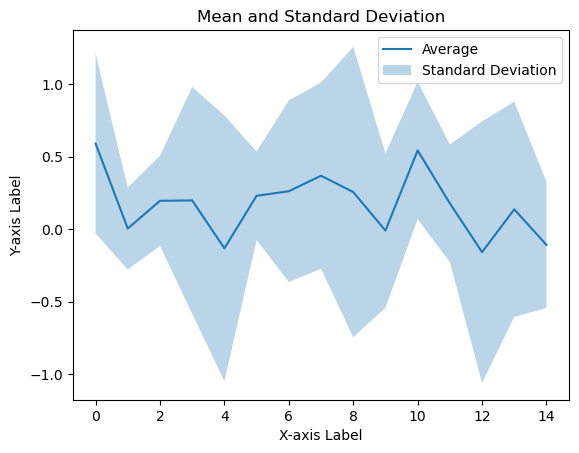

In [229]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'high_stim' is your numpy array with shape (4, 26)
# Calculate the mean and standard deviation along the axis containing the different lines (axis=0)
mean_line = np.mean(high_stim, axis=0)
std_line = np.std(high_stim, axis=0)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the average line
ax.plot(mean_line, label='Average')

# Fill the area between the mean plus/minus one standard deviation
ax.fill_between(range(high_stim.shape[1]), mean_line - std_line, mean_line + std_line, alpha=0.3, label='Standard Deviation')

# Add legend and labels
ax.legend()
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Mean and Standard Deviation')

# Show the plot
plt.show()


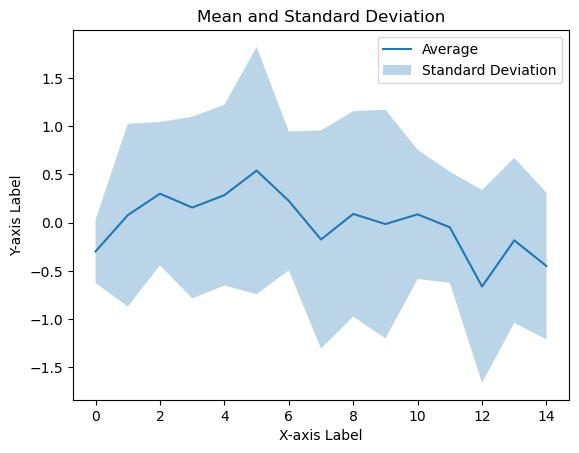

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'high_stim' is your numpy array with shape (4, 26)
# Calculate the mean and standard deviation along the axis containing the different lines (axis=0)
mean_line = np.mean(low_stim, axis=0)
std_line = np.std(low_stim, axis=0)
fig, ax = plt.subplots()
ax.plot(mean_line, label='Average')
ax.fill_between(range(low_stim.shape[1]), mean_line - std_line, mean_line + std_line, alpha=0.3, label='Standard Deviation')

# Add legend and labels
ax.legend()
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Mean and Standard Deviation')

# Show the plot
plt.show()


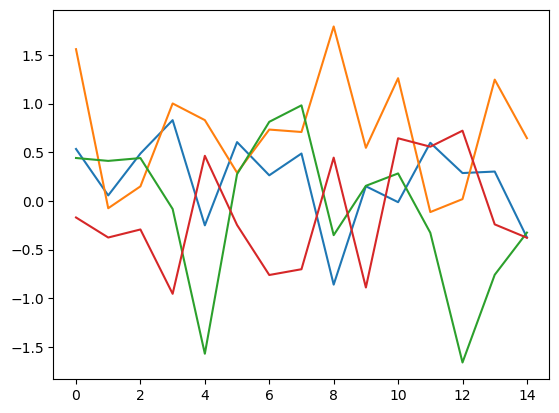

In [231]:
plt.plot(high_stim.T)

In [60]:
import numpy as np

rounded_intervals = np.round(behdf['onset03_stim']).astype(int)
result_intervals = []
for rounded_index in rounded_intervals:
    start_index = max(0, rounded_index - 5)  # Ensure the start index is not negative
    end_index = min(len(time_series.T[0]), rounded_index + 5 + 1)  # Add 10 data points (+1 to include the end index)
    interval = time_series.T[0][start_index:end_index]
    result_intervals.append(interval)

result_intervals = np.vstack(result_intervals)
# print(result_intervals)


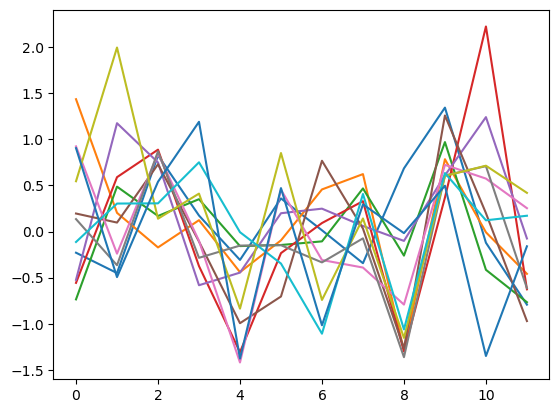

In [59]:
# plt.plot(time_series.T[0])
plt.plot(result_intervals)

In [ ]:
# todo:
# snip out onsets per condition
# where is that?